In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_avalanche",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.5,
                      "num_val_benchmarks" : 2,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "LwF",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 1000,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 1,
                #"lr" : (5e-5, 2e-3),
                "num_epochs" : (3,3),
                #"ewc_lambda" : (400,400)
                "lwf_alpha" : (0.1, 0.9),
                "lwf_temperature" : (1, 3),
                }

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [5]:
device = get_device(2)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-25 11:19:21,947] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 67.09it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5073
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8533
100%|██████████| 235/235 [00:03<00:00, 68.69it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1335
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9581
100%|██████████| 235/235 [00:03<00:00, 71.11it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1047
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9668
-- >> End of training phase << --


[I 2024-07-25 11:19:34,279] Trial 0 finished with value: 95.80821276595748 and parameters: {'num_epochs': 3, 'lwf_alpha': 0.6180408394824187, 'lwf_temperature': 2}. Best is trial 0 with value: 95.80821276595748.


-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 71.24it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4876
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8589
100%|██████████| 235/235 [00:03<00:00, 72.05it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1329
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9587
100%|██████████| 235/235 [00:03<00:00, 68.35it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1040
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9669
-- >> End of training phase << --


[I 2024-07-25 11:19:46,336] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 71.70it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4651
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8700
100%|██████████| 235/235 [00:03<00:00, 72.05it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1552
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9534
100%|██████████| 235/235 [00:03<00:00, 74.44it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1078
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9680
-- >> End of training phase << --


[I 2024-07-25 11:20:00,149] Trial 0 finished with value: 89.34197872340428 and parameters: {'num_epochs': 3, 'lwf_alpha': 0.6180408394824187, 'lwf_temperature': 2}. Best is trial 0 with value: 89.34197872340428.


-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 71.74it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4460
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8770
100%|██████████| 235/235 [00:03<00:00, 72.62it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1458
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9563
100%|██████████| 235/235 [00:03<00:00, 73.96it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1105
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9671
-- >> End of training phase << --


[I 2024-07-25 11:20:11,909] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 72.46it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4003
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8832
100%|██████████| 235/235 [00:03<00:00, 71.93it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1577
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9532
100%|██████████| 235/235 [00:03<00:00, 72.80it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1183
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9650
-- >> End of training phase << --


[I 2024-07-25 11:20:27,833] Trial 0 finished with value: 72.55808510638299 and parameters: {'num_epochs': 3, 'lwf_alpha': 0.6180408394824187, 'lwf_temperature': 2}. Best is trial 0 with value: 72.55808510638299.


-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 71.87it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4031
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8844
100%|██████████| 235/235 [00:03<00:00, 72.00it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1702
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9498
100%|██████████| 235/235 [00:03<00:00, 72.02it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1199
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9645
-- >> End of training phase << --


## Visualize results

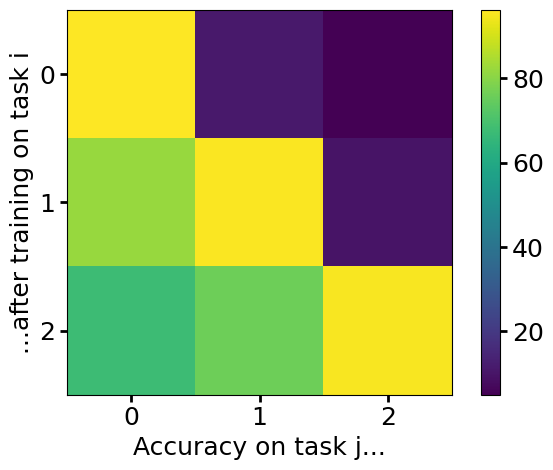

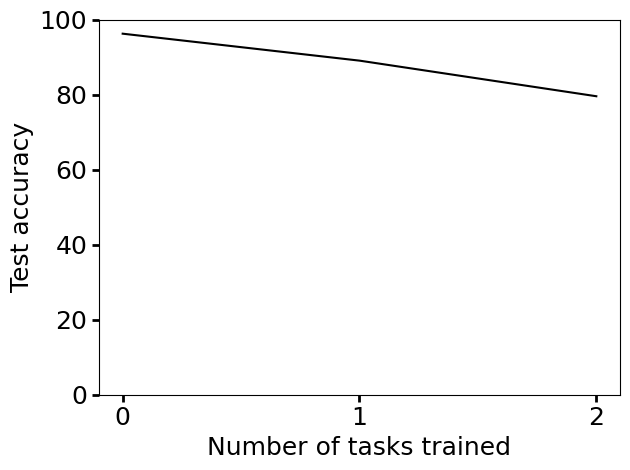

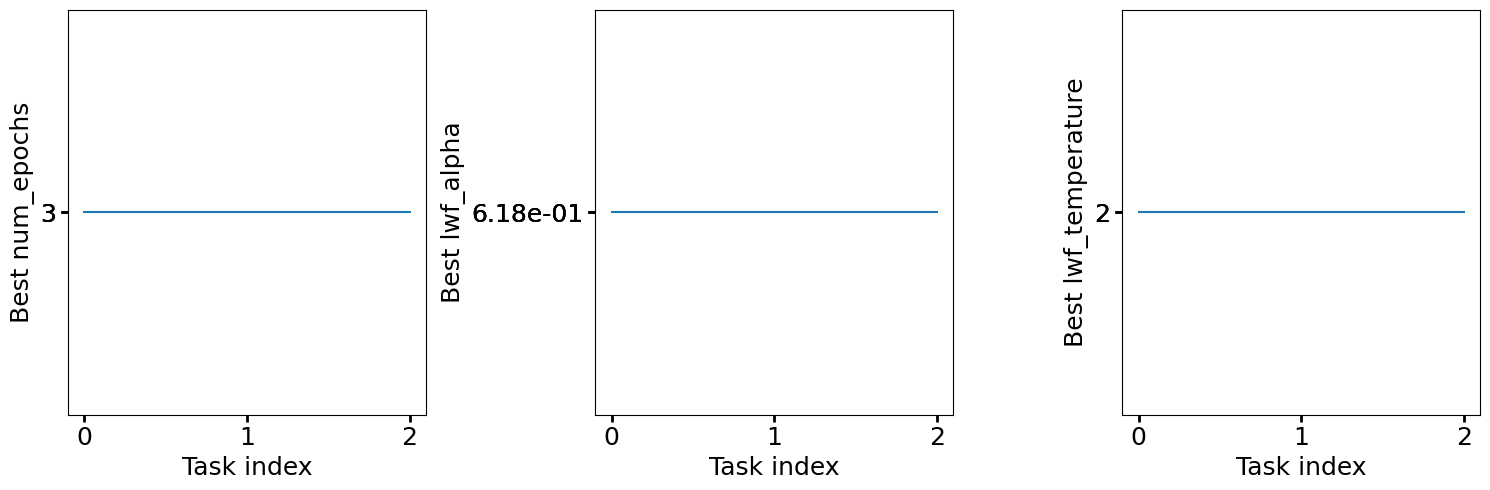

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1
-- >> Start of training phase << --
0it [00:00, ?it/s]

100%|██████████| 235/235 [00:03<00:00, 71.34it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4502
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8682
100%|██████████| 235/235 [00:03<00:00, 71.35it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1412
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9570
100%|██████████| 235/235 [00:03<00:00, 72.22it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1101
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9652
-- >> End of training phase << --

--------------------------------------------------
LEARNING TASK 2
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 74.15it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5134
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8505
100%|██████████| 235/235 [00:03<00:00, 72.87it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1570
	Top1_Acc_Epoch/train_phase/train_s

## Visualize validation

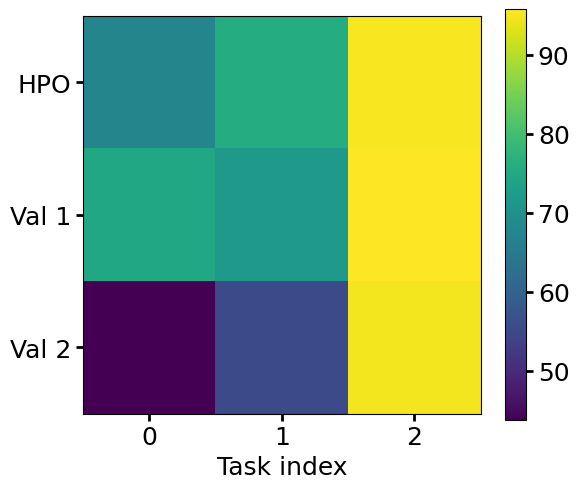

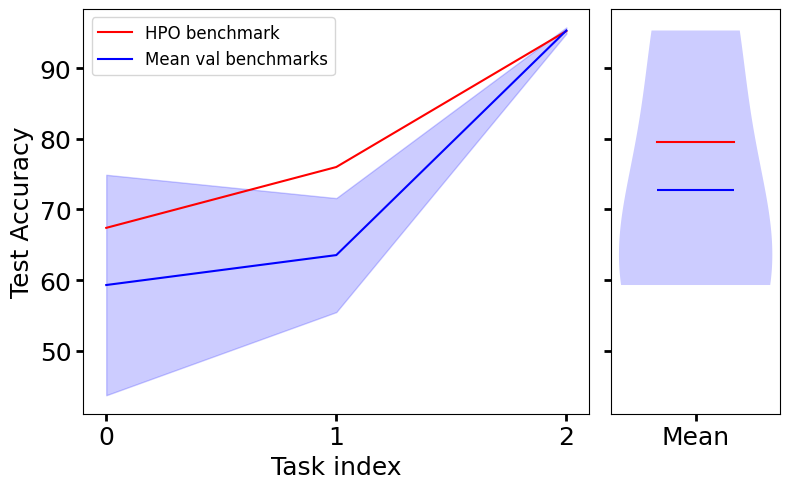

In [10]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [11]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)